# Analise Exploratória dos Dados

In [29]:
import pandas as pd
import seaborn as sns
import statistics as sts

In [46]:
# importar dados
dataframe = pd.read_csv('dados/tempo.csv', sep = ';')

# visualizar os primeiros
dataframe.head()

,Aparencia,Temperatura,Umidade,Vento,Jogar
0,sol,85,85.0,FALSO,nao
1,sol,80,90.0,VERDADEIRO,nao
2,nublado,83,86.0,FALSO,sim
3,chuva,70,NaN,FALSO,sim
4,chuva,68,80.0,FALSO,sim


In [7]:
dataframe.shape

(14, 5)

# Aparência

Por definição da lógica de negócio a **Aparência** deve estar em entre ***sol***, ***nublado*** e ***chuva***.

<AxesSubplot:xlabel='Aparencia'>

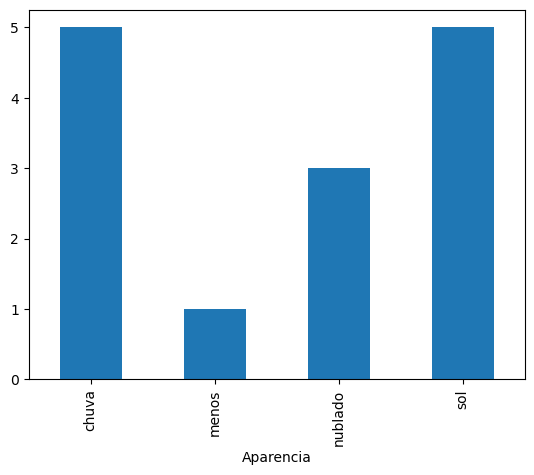

In [27]:
aparencia = dataframe.groupby(['Aparencia']).size()
aparencia.plot.bar()

Há um dado que está fora do padrão. Uma solução para isso é escolher o valor modal, porém possuímos uma distribuição bimodal. Nesse caso, você é preciso considerar qual dos valores modais é mais adequado de acordo com a lógica de negócio do problema.

A lógica de negócio aqui não é tão bem definida, assim, a escolha se dara de forma aleatória, já que ambos valores modais são aceitáveis.

# Temperatura

Nesse *dataset* a **Temperatura** é definida em grau fahrenheit, como ele é um dado númerico podemos ver uma descrição rápida sobre os valores.

In [31]:
dataframe['Temperatura'].describe()

count      14.000000
mean      155.571429
std       306.433759
min        64.000000
25%        69.250000
50%        73.500000
75%        80.750000
max      1220.000000
Name: Temperatura, dtype: float64

Ah 3 valores interessantes para se observar aqui! A ***média***, a ***mediana*** e o ***maior valor***. Isso pois o **maior valor** nos indicar algo de estranho já que ele se destoa da ***média*** e a ***mediana***.

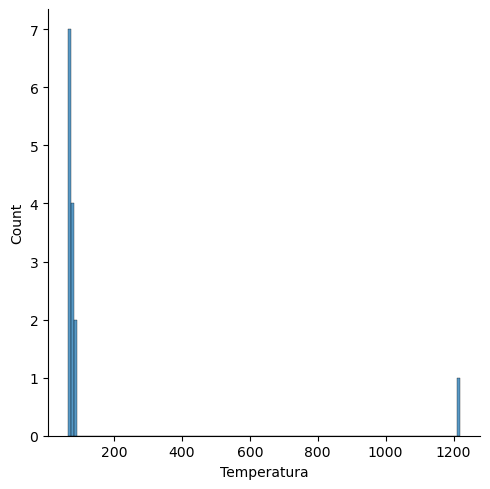

In [32]:
sns.displot(dataframe['Temperatura'])

Ao fazer o gráfico da distribuição, fica visível uma *outlier* próxima do valor de $ 1200 $ que é justamente a temperatura de $ 1220 $ encontrada na descrição anterior.

Aqui, a solução de tratamento para esse valor é substituí-lo pela a ***mediana*** dos valores. É importante ressaltar que o uso da ***mediana*** é fundamental já que a ***média*** sofreu um enviesamento por parte do dado errado. A ***média*** é uma medida que usa como base todos os dados da coluna do *dataset*, enquanto a ***mediana*** usa o valor central do conjunto ordenado.

Por mais que haja na lógica de negócio um limite inferior e limite superior para o *dataset*, uma outra medida que pode vir a ser interessante para uma busca inicial por *outliers* é a medida de ***desvio padrão***, podendo por momentos aferir que os dados duas vezes acima ou abaixo do ***desvio padrão*** são *outliers* no *dataset*.